In [1]:
ZZ

Integer Ring

In [2]:
NN

Non negative integer semiring

In [3]:
QQ

Rational Field

Chapter 3 Sage introduction


In [9]:
print(ZZ(5))
print(ZZ(5) +ZZ(3))
ZZ(5)*NN(3)

5
8


15

In [10]:
factor(NN(504))

2^3 * 3^2 * 7

In [14]:
# Exercise 3.1
print(abs(-123), abs(27), abs(0))
# Exercise 3.2: factor 30030 => 2*5*3*1001
print(factor(30030))
print(factor(1001))
# Exercise 3.3: given 4*x + 21 = 5
# 1. find solutions in N => [0,inf) = > no solutions
# 2. find solutions in Z => -4

123 27 0
2 * 3 * 5 * 7 * 11 * 13
7 * 11 * 13


In [2]:
print(ZZ(-17) // ZZ(4))
print(ZZ(-17) % ZZ(4))


-5
3


In [1]:
def add(a,b):
    return a+b
    
print(add(3,5))

8


In [49]:
# extended euclidean algorithm
# find GCD(a,b) = s*a + t*b
def eea(a: int,b: int) -> (int, int, int):
    assert(a >= b)
    r= [a,b]
    s = [1,0]
    t = [0,1]
    k = 2
    while true:
        if r[1] == 0:
            break
          
        q = r[0] // r[1]
        r= [r[1], r[0]%r[1] ]
        s = [s[1], s[0] - q*s[1] ]
        t = [t[1], t[0] - q*t[1] ]

    assert (r[0] == s[0]*a + t[0]*b)
    # ensure postive gcd
    if r[0] < 0:
        r[0] = -r[0]
        s[0] = -s[0]
        t[0] = -t[0]
    return r[0], s[0], t[0]

print(eea(16,12))
print(eea(12,5))
print(eea(5,-12))
print(eea(24,-4255))
ZZ(12).xgcd(ZZ(5))
        

(4, 1, -1)
(1, -2, 5)
(1, 5, 2)
(1, -1241, -7)


(1, -2, 5)

In [8]:
#Exercise 3.8: find s,t E Z such that gcd(a,b) = s*a + t*b
a,b = 45,10
print(eea(a,b))
a,b = 13,11
print(eea(a,b))
a,b = 13,12
print(eea(a,b))
ZZ(a).xgcd(ZZ(b))

(5, 1, -4)
(1, -5, 6)
(1, 1, -1)


(1, 1, -1)

In [9]:
# Exercise 3.9: let n E N and p a prime number with n < p. What is the gcd(n,p)?
# the answer is 1. p has no divisors and n is less the p

In [13]:
# Exercise 3.10: find all numbers k E N with 0 <= k < 100 such that gcd(k,100) = 5
# the factors of 100 are 2^2 * 5^2
# so we need 5 and odd numbers divisible by 5 and not 25
# 5, 15, 35, 45, 55, 65, 85, 95

for x in range(100):
    if ZZ(x).gcd(ZZ(100)) == 5:
        print(x)


5
15
35
45
55
65
85
95


In [ ]:
# Exercise 3.11: show gcd(a,b) = gcd(a+b,b) for all n,m E N
# let d = gcd(a,b)
# a = d*a'
# b = d*b'
# a+b = d*a' + d*b' = d(a'+b')
# so d is a common divisor of a+b and b
# thanks copilot. in my own words -- the gcd is largest common factor. adding a + b = gcd*(a1+b1)
# by definition a1, b1 don't have any common factor, since all the common prime factor are absorbed
# into gcd


In [16]:
# Exercise 12: what pairs are coprime? (45,10), (13,12), (13,11)
cases = [
    [45,10,False],
    [13,11,True],
    [13,12,True],
]
print(cases)

for c in cases:
    assert(ZZ(c[0]).gcd(ZZ(c[1])) == 1) == c[2]

[[45, 10, False], [13, 11, True], [13, 12, True]]


In [32]:
# Exercise 3.13: convert octal to decimal for 0o1354, 0o777
def octal_to_decimal(x:str) -> int:
    out = 0
    i = 0
    # reverse range
    y=x[::-1]
    for c in y:
        out += int(c)*pow(8,i)
        i+=1
    return out

print(octal_to_decimal("10"))
print(octal_to_decimal("1354"))
print(octal_to_decimal("777"))

assert(octal_to_decimal("1354") == int("1354",8))


8
748
511


In [34]:
# Exercise 14: which are congruent wrt 13:
# (5,19): no 5 mod 13 = 5 != 6 = 19 mod 13
# (13,0): yes

cases = [
    [5,19,False],
    [13,0, True],
    [-4,9,True],
    [0,0,True],
]

modulus = 13
for c in cases:
    assert(ZZ(c[0]).mod(ZZ(modulus)) == ZZ(c[1]).mod(ZZ(modulus))) == c[2]

In [ ]:
# Exercise 15: find all integers x, such that the congruence x==4 mod 6
# 4, 4 + 6, 4+ 2*6, ... and 4 -6, 4 - 2*6, ...

In [37]:
# Exercise 16: mod 13, find x such that 5x + 4 == 28 + 2x
# 3x = 24 => x = 8 mod 13

def ex16(p: int) -> bool :
    return (ZZ(5)*ZZ(p) + ZZ(4)) % ZZ(13) == (ZZ(28) + ZZ(2)*ZZ(p)) % ZZ(13)

assert(ex16(8))
assert(ex16(8+3*13))
assert(ex16(8-2*13))

In [39]:
# Exercise 17: find x such that 69x = 5 mod 23
# 69 mod 23 = 0  there are no solutions: 0x = 5 mod 23
def ex17(p: int) -> bool :
    return (ZZ(69)*ZZ(p)) % ZZ(23) == ZZ(5)

for x in range(23):
    if ex17(x):
        print(x)


In [41]:
# Exercise 18: find x such that 69x = 46 mod 23
# this reduces to 0x = 0 mod 23, so the solution is all element Z

def ex18(p: int) -> bool :
    return (ZZ(69)*ZZ(p)) % ZZ(23) == ZZ(46) % ZZ(23)

for x in range(23):
    if ex18(x):
        print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
# Exercise 19: let a,b,k E Z such that  a= b mod n. show a^k = b^k mod n
# this reduces to a = a mod n, so a^k = a^k mod n
# 

In [42]:
# Exercise 20: let a,n  E Z such that gcd(a,n) != 1 (i.e not coprime). For which
# b E Z is there a solution to the congruence ax = b mod n?
# b must be a multiple of gcd(a,n)




In [53]:
# Exercise 22: consider mod n =24: which integers 1,7,0,805,-4255 have multipicative inverses?
# multplicate inverse means being coprime with n. it's easy to see that 1 and 7 are coprime with 24 while 0 is not. we can check the other two
# using our Extended Euclidean Algorithm

assert (ZZ(805).gcd(ZZ(24)) == 1)
assert (ZZ(-4255).gcd(ZZ(24)) == 1)

#  two compute the inverse of a number r mod n, we can use the Extended Euclidean Algorithm when gcd(r,n) = 1
#  this follows from the fact that gcd(r,n) = 1 = s*r + t*n
#  so that if we mod this by n, we have 1 = s*r mod n and s is the inverse of r mod n
def inverse(r:int, n: int) -> int:
    #assert(ZZ(r).gcd(ZZ(n)) == 1)
    # eea requires r >=n
    if r >= n:
        d,s, _ = eea(r,n)
        assert(d == 1)
        return s % n
    else:
        d,_, t = eea(n,r)
        assert(d == 1)
        return t %n 


for x in [1,7,805,-4255]:
    print(x, inverse(x,24))
    inv = inverse(x,24)
    assert(x*inv % 24 == 1)
    assert inv == ZZ(x).inverse_mod(ZZ(24))

1 1
7 7
805 13
-4255 17


In [86]:
# Exercise 23: projecting into Z_y: find the solutions to the congruence 16(2x+5) - 4 == 2x + 4 (mod 5)
# projecting in Z_5 means dividing all the terms  > |5| by 5 and taking the remainder =>
# 2(*2x+0_) - 4 == 2x+ 4 (mod 5) => 2x = 8 mod 5 => 2x = 3 mod 5.
# since 5 is prime we can use Fermat's little theorem to find the inverse of 2 mod 5

def little_fermat(a:int, p:int) -> int:
    assert(p > 1 and ZZ(p).is_prime())
    return pow(a,p-2,p)

print(little_fermat(2,5))
x = 3*little_fermat(2,5) % 5
print(x)
print(little_fermat(1,5))

print(little_fermat(6,5))
print("6^3", pow(6,3))

3
4
1
1
6^3 216


In [67]:
# Polynomial long division
# A,B polynomials E R(x) with B != 0 (i.e polynomials in x with real coefficients) such that deg(A) >= deg(B) and LC(B)^-1 exists in R
# (LC is the leading coefficient of B)
# we can find Q,R such that A = BQ + R and deg(R) < deg(B)
# the algorithm is as follows:
# 1. set Q = 0 and R = A
# 2. if deg(R) < deg(B) stop
# 3. divide the leading term of R by the leading coefficient of B and call the result q
# 4. set Q = Q + q*x^(deg(R)-deg(B)) and R = R - q*B
# 5. go to step 2

# Exercise 24: divide 2x^3 + 3x^2 - 5x + 1 by x-2
# 1. Q = 0, R = 2x^3 + 3x^2 - 5x + 1
# 2. deg(R) = 3 >= deg(B) = 1
# 3. q = 2x^2   (leading term of R = 2x^3, leading coefficient of B = 2)
# 4. Q = 2x^2, R = 2x^3 + 3x^2 - 5x + 1 - 2x^2*(x-2) = 7x^2 - 5x + 1
# 5. go to step 2
# 2. deg(R) = 2 >= deg(B) = 1
# 3. q = 7x   (leading term of R = 7x^2, leading coefficient of B = 1)
# 4. Q = 2x^2 + 7x, R = 7x^2 - 5x + 1 - 7x*(x-2) =9x + 1
# 5. go to step 2
# 2. deg(R) = 1 >= deg(B) = 1
# 3. q = 9   (leading term of R = 9x, leading coefficient of B = 1)
# 4. Q = 2x^2 + 7x + 9, R = 9x + 1 - 9*(x-2) = 19

Zx = ZZ['x']
A = Zx([1,-5,3,2])
B = Zx([-2,1])
Q = Zx([9,7,2])
R = Zx([19])
print(B*Q +R)
print(A, "=(", B, ")*(", Q, ")+", R)
assert(A == B*Q + R)
#

2*x^3 + 3*x^2 - 5*x + 1
2*x^3 + 3*x^2 - 5*x + 1 =( x - 2 )*( 2*x^2 + 7*x + 9 )+ 19


In [77]:
# Exercise 27: A(x) = -3x^4 + 4x^3 +2x^2 + 4, B(x) = x^2 - 4x +2
#  A: Compute Euclidean Algorithm for A,B E Z[x]
# Q = 0, R = -3x^4 + 4x^3 +2x^2 + 4
# deg(R) = 4 >= deg(B) = 2
# q = -3x^2
# Q = -3x^2, R = -3x^4 + 4x^3 +2x^2 + 4 -[ (-3x^2)*(x^2 - 4x +2) ] = -8x^3 + 8x^2 + 4
# deg(R) = 3 >= deg(B) = 2
# q = -8x
# Q = -3x^2 + -8x, R = -8x^3 + 8x^2 +4 - (-8x)*(x^2 - 4x +2) = -24x^2 +16x +4
# deg(R) = 2 >= deg(B) = 2
# q = -24
#  Q = -3x^2 + -8x - 24, R = -24x^2 + 16x + 4 - (-24)*(x^2 - 4x +2) = -80x +52
# Q = -3x^2 + -8x - 24, R = -80x + 52

Zx = ZZ['x']
A = Zx([4,0,2,4,-3])
B = Zx([2,-4,1])
Q = Zx([-24,-8,-3])
R = Zx([52,-80])

print(A, "=(", B, ")*(", Q, ")+", R)
print( B*Q + R)
assert(A == B*Q + R)

# B: do the same for A,B E Z_6[x]
# note: we can do the same since the leading coefficient of B is 1 which is invertible in Z_6
# Q = 0, R = -3x^4 + 4x^3 +2x^2 + 4
# deg(R) = 4 >= deg(B) = 2
# q = -3x^2
# Q = -3x^2, R = -3x^4 + 4x^3 +2x^2 + 4 - (-3x^2)*(x^2 - 4x +2)  = 4x^3 + 2x^2 + 4 - 12x^3 + 6x^2 = 4x^3 + 2x^2 + 4 where the two terms = 0 mod 6
# deg(R) = 3 >= deg(B) = 2
# q = 4x
# Q = -3x^2 + 4x, R = 4x^3 + 2x^2 + 4 - 4x*(x^2 - 4x +2) =  2x^2 + 4  + 16x^2 - 8x = 18x^2 - 8x + 4 = -8x+ 4 = 4x + 4
# Q = 3x^2 + 4x , R = 4x + 4 where we used -3 mod 6 = 3 mod 6

# this could have been derived from the previous result by taking the remainder of each term mod 6
# Q = -3x^2 + -8x - 24, R = -80x + 52 mod 6 => Q = 3x^2 + 4x - 0, R = -2x + 4 = 4x + 4



-3*x^4 + 4*x^3 + 2*x^2 + 4 =( x^2 - 4*x + 2 )*( -3*x^2 - 8*x - 24 )+ -80*x + 52
-3*x^4 + 4*x^3 + 2*x^2 + 4


In [80]:
# Larange interpolation: given n+1 points (x_0,y_0),...,(x_n,y_n) with x_i != x_j for i != j, 
# there is a unique polynomial P(x) of degree at most n such that P(x_i) = y_i for all i
# the polynomial is given by:
# P(x) = sum_{i=0}^n y_i * l_i(x)
# where l_i(x) = product_{j=0, j != i}^n (x - x_j)/(x_i - x_j)

# Example: find the polynomial of degree at most 2 that passes through the points (0,5), (5,-2), (-7,12)
# P(x) = 5 * l_0(x) + -2 * l_1(x) + 12 * l_2(x)
# l_0(x) = (x-x1)/(x0-x1) * (x-x2)/(x0-x2) = (x-5)/(0-5) *(x+7)/(0+7)= -(x-5)(x+7)/35
# l_1(x) = (x-x0)/(x1-x0) * (x-x2)/(x1-x2) = (x-0)/(5-0) *(x+7)/(5+7)= (x)(x+7)/60
# l_2(x) = (x-x0)/(x2-x0) * (x-x1)/(x2-x1) = (x-0)/(-7-0) *(x-5)/(-7-5)= (x)(x-5)/84
# P = 5 * (-(x-5)(x+7)/35) + -2 * (x)(x+7)/60 + 12 * (x)(x-5)/84
# P = -(x-5)(x+7)/7 - (x)(x+7)/30 +  (x)(x-5)/7
Qx = QQ['x']
S = [(0,5), (5,-2), (-7,12)]
Qx.lagrange_polynomial(S)

-1/30*x^2 - 37/30*x + 5

In [89]:
# Exercise 31: find P E Z_5[x] given the set S={(0,0), (1,1), (2,2), (3,2)}
# P(x) = 0 * l_0(x) + 1 * l_1(x) + 2 * l_2(x) +2 * l_3(x)
# l_0(x) = (x-1)/(0-1) * (x-2)/(0-2) * (x-3)/(0-3) = (x-1)(x-2)(x-3)/6
# l_1(x) = x*(x-2)*(x-3)/(1*(1-2)*(1-3)) = x*(x-2)(x-3)/2 (mod 5) = 3*x*(x-2)(x-3)
# l_2(x) = x*(x-1)*(x-3)(2*(2-1)*(2-3)) = - x*(x-1)(x-3)/2 mod 5 = 4*3*x*(x-1)(x-3) = 2*x*(x-1)(x-3)
# l_3(x) = x*(x-1)*(x-2)/(3*(3-1)*(3-2)) = x*(x-1)(x-2)/6 mod 5 = x*(x-1)(x-2)
# P(x) = 3*x*(x-2)(x-3) + 2 * 2* x*(x-1)(x-3) + 2 * x*(x-1)(x-2) mod 5
# = (3 + 4 +2)x^3 + x^2(-6 -9 -4 -12 -2 -4)) + x(18+12+4) =
# 4x^3 +3x^2 + 4x

F5 = GF(5)
F5x = F5['x']
S=[(0,0), (1,1), (2,2), (3,2)]
F5x.lagrange_polynomial(S)

4*x^3 + 3*x^2 + 4*x

In [92]:
## Chapter 4: Algebra

# Exercise 33: consider the remainder classes of Z_5[x] excluding the zero class. Show Z*_5[x] is a abelian group under multiplication
# one way to do this is look at the multiplciation table and see that every row contains all the elements of Z*_5[x]
# and that that this matrix is symmetric. the first property means that multiplication is closed and the second that it is abelian

# z_5 under multiplication
# * 0 1 2 3 4
# 0 0 0 0 0 0
# 1 0 1 2 3 4
# 2 0 2 4 1 3
# 3 0 3 1 4 2
# 4 0 4 3 2 1

# in general this subset excluding the 0 remainder class is NOT a group under multiplication. z_6 is a counter example; we know
# from the book that some elements don't have inverses. specifically those elements that are not coprime with 6. This implies that the 
# modulus must be prime for the subset to be a group under multiplication

In [94]:
# Exercise 34: let n E N n >= 2 be some modulus. What is the order of the remainder class of the group (Z_n,+)?
# the order is the number of remainders, which is the value of n. this is easy to see by taking elements n, n+1, n+2, ... 2n-1, 2n, 2n+1 and doing the division

# Exercise 36: consider the group (Z_6,+). show that 5 is a generator and 2 is not
# 5, 2*5, 3*5, 4*5, 5*5, 6*5 = 5, 10/6 = 4, 15/12 =3, 20/18 = 2, 25/24 = 1, 30/30 = 0
# 2, 2*2, 3*2, 4*2, 5*2, 6*2 = 2, 4/6 = 4, 6/6 = 0, 8/6 = 2, ...

# Exercise 36: Let p ∈ P be prime number and (Z∗p,·) the finite group of remainder classes excluding 0. Show that (Z∗p,·) is cyclic.
# 2 is always a generator. you can see that {2^m} m < log(p/2) enumerates all the even elements. the first value of 2^m larger than p must be odd (mod p) 
# because 2^m is even and even - odd is odd. so that means the 2^(m+1) to 2^2m enumerates odd elements. these elements have to be unique because the each of the numerators is unique
# and bounded between p and 2p. since the are bound, we know mod p is unique in that range by assumption of being prime. 



In [1]:
# Skipping to chapter 4, other work done on paper
import hashlib
test = 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'
empty_string = ""
binary_string = empty_string.encode()
print(binary_string)
hasher = hashlib.sha256
binary_hash = hasher(binary_string).hexdigest()
print(binary_hash)
type(binary_hash)
d =ZZ('0x'+binary_hash) # conversion to int
print(d)
print(d.str(16))
assert(d.str(16) == test)



b''
e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
102987336249554097029535212322581322789799900648198034993379397001115665086549
e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855


In [37]:
# Pedereson Hash 
# H_{g_1...g_j} : (Z_r)^j -> G: (x_1,...,x_j) -> g_1^x_1 * ... * g_j^x_j where Z_r is the set of integers modulo r
# Example 49: cyclic group Z^*_5 which is the set of remainder classes of Z_5 excluding 0. Take g_1=2, g_2=3 
# H_{2,3} : Z_4 x Z_4 -> Z^*_5: (x_1,x_2) -> 2^x_1 * 3^x_2
# we can use this to Hash to Group by composing with a hash function
# SHA256_H_{2,3} : {0,1}^* -> Z^*_5; x -> 2^(SHA256(x)_0) * 3^(SHA256(x)_1)
# note that this a subset of z^*_5, the possible elements are (1*1),(1*3),(2*1),(2*3)=1
import hashlib
def SHA256_H23(x: str) -> int:
    # sha256 as array of 0,1,s
    hasher = hashlib.sha256
    digest = hasher(x.encode()).hexdigest()
    x = ZZ(digest,16)
    x_bin = x.digits(base=2, padto=256)  # conversion to int

    # group to hash into
    Z5 = Integers(5)
    return Z5(2)^x_bin[0] * Z5(3)^x_bin[1]

print(SHA256_H23("hello"))
print(SHA256_H23(""))
print(SHA256_H23("SHA"))
print(SHA256_H23("Math"))


# Exercise 45: consider Z^*_13. Define the Pederson Hash  : Z_12 x Z_12 -> Z^*_13
def SHA256_Pederson(x:str, p, *generators) -> int:
    #Zp = Integers(13)    
    for g in generators:
        # hack to check if generator. must be a better way
        assert ZZ(g).gcd(ZZ(p)) == 1 and g < p and g !=1
    # sha256 as array of 0,1,s
    digest = hashlib.sha256(x.encode()).hexdigest()
    x = ZZ(digest,16)
    x_bin = x.digits(base=2, padto=256) 

    # group to hash into
    Z_P= Integers(p)
    r = ZZ(1)
    for i in range(len(generators)):
       # print(i, generators[i], x_bin[i], r)
        r = Z_P(r) * Z_P(generators[i])^x_bin[i]
    return r

print(SHA256_Pederson("hello", 13, 7,5,3))
print(SHA256_Pederson("hello", 13, 2,7,9))
print(SHA256_Pederson("this is a message to be hashed into a cyclic group", 13, 2,7,9))



1
2
3
1
3
9
5


In [40]:
# Field in sage, section 4.3
Z3 = GF(3) #prime field
print(Z3)
Z3t.<t> = Z3[] #polynomial ring over Z3
P =  Z3t(t^2 +1)
P.is_irreducible()
F3_2.<t> = GF(3^2, name='t', modulus=P) # extension field F_3^2
print(F3_2)
assert F3_2(t+2) * F3_2(2*t+2) == F3_2(2)
 

Finite Field of size 3
Finite Field in t of size 3^2


In [48]:
# Show that the polynomial P=t^3+t+1 from F_5[t] is irreducible. Then consider the extension field F_5^3 
# defined relative to P.Compute the multiplicative inverse of (2t2+4)∈ F53 using the Extended Euclidean Algorithm. 
# Then find all x ∈ F53 that solve the following equation:
# (2t^2 +4)(x−(t^2 +4t +2)) = (2t +3)

def ex55():
    Z5 = GF(5)
    Z5t.<t> = Z5[] #polynomial ring over Z3
    P =  Z5t(t^3 +t +1)
    assert P.is_irreducible()
    # manual check:
    for x in range(5):
        assert P(Z5(x)) != 0
    print(P)
    F5_3.<t> = GF(5^3, name='t', modulus=P) # extension field F_3^2
    print(F5_3)
    print(F5_3(2*t^2 +4).inverse())
    print(F5_3(2*t^2 +4) * F5_3(2*t^2 + 2*t + 3))
    print(F5_3(2*t^2 +4) * (F5_3(2*t^2 +4) - F5_3(t^2 +4*t +2)) == F5_3(2*t +3))

ex55()

# from pen and paper, i found the inverse to be 4t^2 + 4t + 1

t^3 + t + 1
Finite Field in t of size 5^3
4*t^2 + 4*t + 1
3
False


Elliptic Curve defined by y^2 = x^3 + 2*x + 4 over Finite Field of size 5
7
[(0 : 1 : 0), (0 : 2 : 1), (0 : 3 : 1), (2 : 1 : 1), (2 : 4 : 1), (4 : 1 : 1), (4 : 4 : 1)]
(0 : 2 : 1)
affine coords (0, 2)


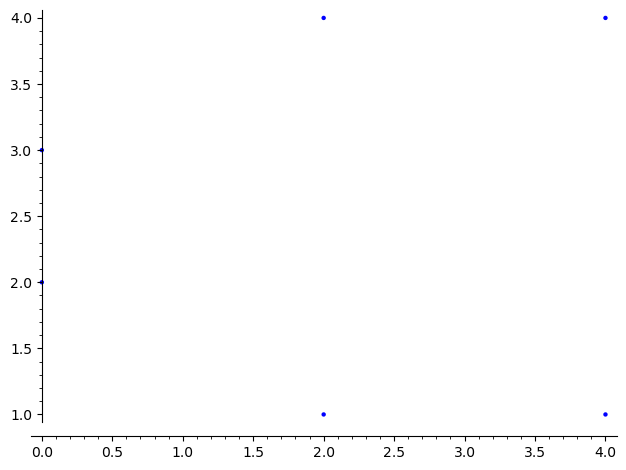

In [49]:
# Chapter 5: Elliptic Curves
# weierstrass form: y^2 = x^3 + ax + b
F5 = GF(5) # base field
a = F5(2)
b = F5(4)
# check discriminant to ensure non-singular
assert F5(4) * a**3 + F5(27) * b**2 != 0
E = EllipticCurve(F5, [a,b])
print(E)
print(E.cardinality())
print(E.points())
P = E(0,2)
print(P)
print("affine coords", P.xy())
POIF = E(0)
E.plot()


Elliptic Curve defined by y^2 = x^3 + 8*x + 8 over Finite Field of size 13
20
[(0 : 1 : 0), (1 : 2 : 1), (1 : 11 : 1), (4 : 0 : 1), (5 : 2 : 1), (5 : 11 : 1), (6 : 5 : 1), (6 : 8 : 1), (7 : 2 : 1), (7 : 11 : 1), (8 : 5 : 1), (8 : 8 : 1), (9 : 4 : 1), (9 : 9 : 1), (10 : 3 : 1), (10 : 10 : 1), (11 : 6 : 1), (11 : 7 : 1), (12 : 5 : 1), (12 : 8 : 1)]


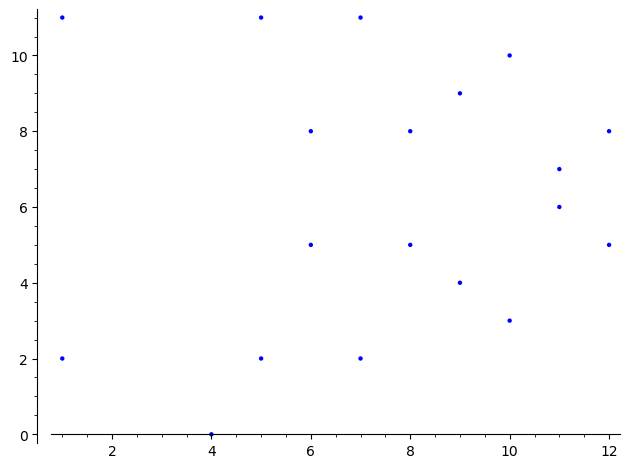

In [52]:
tinyJJ = EllipticCurve(GF(13), [8,8])
print(tinyJJ)
print(tinyJJ.cardinality())
print(tinyJJ.points())
tinyJJ.plot()

In [65]:
# Exercise 60: implement BCLS12-381 in sage
# warmup, implement secp256k1 and alt_bn128
def secp256k1():
    p = 2^256 - 2^32 - 977
    assert p == 115792089237316195423570985008687907853269984665640564039457584007908834671663
    assert p.is_prime()
    print(p.nbits())
    print(p.str(16))
    Fp = GF(p)
    secp256k1 = EllipticCurve(Fp, [0,7])
    r = secp256k1.order()
    print("order ", r, " cardinality ", secp256k1.cardinality())
    print(r.str(16))
    assert r.is_prime()
    print(r.nbits())

secp256k1()

def alt_bn128():
    a = 0
    b = 3
    p = 21888242871839275222246405745257275088696311157297823662689037894645226208583
    assert p.is_prime()
    print(p.nbits())
    curve = EllipticCurve(GF(p), [a,b])
    print(curve)
    r = curve.order()
    print("order ", r, " cardinality ", curve.cardinality())
    assert r.is_prime()    
    print(r.nbits())
    print(r.str(16))

print("alt_bn128")
alt_bn128()

def bls12_381():
    p= 0x1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab
    assert ZZ(p).is_prime()
    print(p.nbits())
    print(p.str(16))
    print(int(p))
    a = 0
    b = 4
    curve = EllipticCurve(GF(p), [a,b])
    print(curve)
    r = curve.order()
    print("order ", r, " cardinality ", curve.cardinality())
    print(r.nbits())
    print(r.str(16))
    
print("bls12_381")
bls12_381()

256
fffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f
order  115792089237316195423570985008687907852837564279074904382605163141518161494337  cardinality  115792089237316195423570985008687907852837564279074904382605163141518161494337
fffffffffffffffffffffffffffffffebaaedce6af48a03bbfd25e8cd0364141
256
alt_bn128
254
Elliptic Curve defined by y^2 = x^3 + 3 over Finite Field of size 21888242871839275222246405745257275088696311157297823662689037894645226208583
order  21888242871839275222246405745257275088548364400416034343698204186575808495617  cardinality  21888242871839275222246405745257275088548364400416034343698204186575808495617
254
30644e72e131a029b85045b68181585d2833e84879b9709143e1f593f0000001
bls12_381
381
1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab
4002409555221667393417789825735904156556882819939007885332058136124031650490837864442687629129015664037894272559787
Elliptic Curve defined by y^2 = x^3 + 4 over Finite 

AssertionError: 